In [5]:
# loading the dataset (python bunch)

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [6]:
X, y = mnist["data"], mnist["target"]

In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
import numpy as np
y = y.astype(np.uint8)

In [10]:
# Creating a test set: In order for the learning process to be effective the
# training data should contain a good number of samples of each class. Assuming
# that is the case for the gathered data (otherwise more quality data should be
# gathered), similarly the test set that we want to create better to have the same
# distribution as the training set (e.g. test set should not have only one class.)

In [11]:
%matplotlib inline


(array([6903., 7877., 6990., 7141., 6824., 6313., 6876., 7293., 6825.,
        6958.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

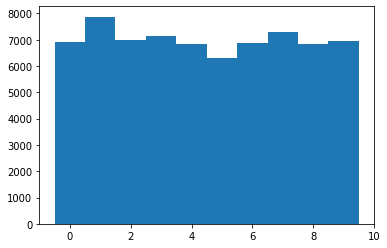

In [12]:
import matplotlib.pyplot as plt

plt.hist(y,bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])

In [13]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:70000], y[60000:70000]

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

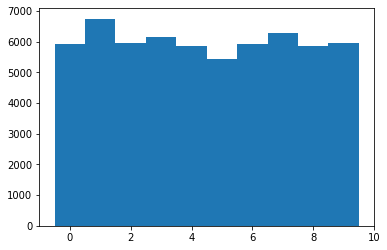

In [14]:
plt.hist(y_train,bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])

(array([ 980., 1135., 1032., 1010.,  982.,  892.,  958., 1028.,  974.,
        1009.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

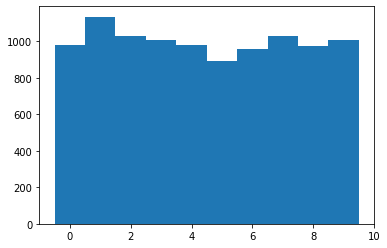

In [15]:
plt.hist(y_test,bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])

In [16]:
# As can be seen the train and test sets have pretty much the same distribution as the whole dataset.
# What if that wasn't the case and we wanted to sample a test set with the same distribution.
# How would we do this?
# There are two concepts in creating a test set:
# 1. making sure that the test set has the same distribution of the whole data set.
# 2. This seems to be less important but good to do it if possible: creating unique
# idetifiers for each instance an be able to perform sampling in a way that is repeatable
# and we are able to pick the same sample points for the test set if were to do it later
# or when new data points are added. If new data points are added at the end of the list of
# intances then regular number indexing works otherwise if they are added arbitrarily and in
# between the instances a more sophisticated indexing is needed as discussed in chapter two of
# Hands on ML book.

In [17]:
# Here we will mostly be concerned with the first option. We do this step to have a complete
# documentation of the method.

from sklearn.model_selection import StratifiedShuffleSplit

sp = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sp.split(X, y):
    strat_train_set = X[train_index]
    strat_test_set = X[test_index]

In [18]:
strat_train_set.shape

(56000, 784)

In [19]:
strat_test_set.shape

(14000, 784)

In [20]:
y_tr = y[train_index]
y_te = y[test_index]

(array([5522., 6302., 5592., 5713., 5459., 5051., 5501., 5834., 5460.,
        5566.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

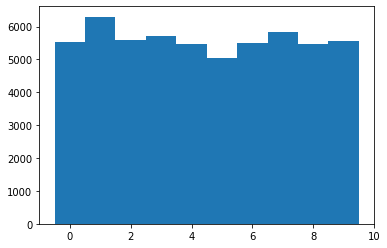

In [21]:
plt.hist(y_tr,bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])

(array([1381., 1575., 1398., 1428., 1365., 1262., 1375., 1459., 1365.,
        1392.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

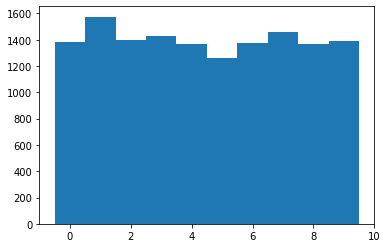

In [22]:
plt.hist(y_te,bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])

In [23]:
# Lets also check the train_test_split method of sklearn for splitting the data
# This method also has a stratified option. we will do both

from sklearn.model_selection import train_test_split

Xtr, Xte, ytr, yte = train_test_split(X,y,test_size = 0.2)

(array([1391., 1538., 1451., 1378., 1403., 1298., 1355., 1436., 1354.,
        1396.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

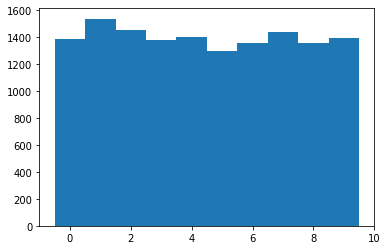

In [24]:
plt.hist(yte,bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])

In [25]:
stXtr, stXte, stytr, styte = train_test_split(X,y,test_size = 0.2, stratify = y)

(array([1381., 1575., 1398., 1428., 1365., 1262., 1375., 1459., 1365.,
        1392.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

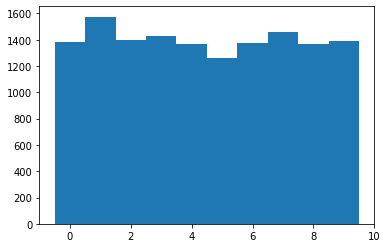

In [26]:
plt.hist(styte,bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])

In [27]:
# So the train_test_split method has both a random split option and a stratified split option.

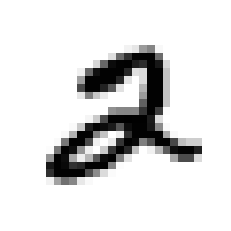

In [28]:
# Step 2: Explore the data

import matplotlib.pyplot as plt
some_digit = X[5]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()


In [29]:
y[5]

2

In [30]:
# To explore the data similar in the general way that dataframes are explored we can transform
# matrix to a dataframe. This step is not necessary here but for completeness we do it.

import pandas as pd

dfX = pd.DataFrame(X)

In [31]:
dfX.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, 0 to 783
dtypes: float64(784)
memory usage: 418.7 MB


In [33]:
des = dfX.describe()

In [34]:
des.iloc[:,700:]

,700,701,702,703,704,705,706,707,708,709,...,774,775,776,777,778,779,780,781,782,783
count,70000.0,70000.0,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.001343,0.015757,0.128429,0.467186,1.367671,3.116943,6.047357,9.696486,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.217647,1.504963,4.629114,9.163429,15.983288,24.537763,34.641638,43.701928,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,42.000000,254.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [35]:
# Its pretty clear up to now that these steps are not very illuminating for these digits
# datasets. The columns belong to different digits. Why would their distribution matter anyways
# or there is no sense of finding there correlation. But for completeness we did these steps.

In [36]:
# 3. Prepare the data for machine learning:

# - perform feature scaling

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

Xtrs = ss.fit_transform(X_train)


In [37]:
np.min(Xtrs[:,200])

-0.11300485291708953

In [38]:
# 4. Explore different machine learning algorithms and find the best ones.

# Logistic regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(penalty='l2', tol=0.0001, C=1.0, random_state=40, solver='liblinear',
                        max_iter=5000, multi_class='ovr')


In [39]:
# Fitting takes a lone time so we will use a previously fitted and saved model.

# LR.fit(Xtrs, y_train) 

In [40]:
Xtes = ss.fit_transform(X_test)


In [41]:
#import joblib

#joblib.dump(LR, "LRss.pkl")

In [42]:
import joblib

my_model_loaded = joblib.load("LRss.pkl")

In [43]:
my_model_loaded.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=40, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [44]:
y_predict = my_model_loaded.predict(Xtes)

In [45]:
y_test[59]

5

In [46]:
y_predict[59]

5

In [47]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_predict)

score

0.9175

In [48]:
from sklearn.svm import SVC

svc = SVC()

In [49]:
# Fitting an svc model takes long so we will load a previously trained model in the next cell

#svc.fit(Xtrs, y_train)

In [50]:
from zipfile import ZipFile

file_name = "svss.pkl.zip"

with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
svss.pkl                                       2020-03-12 13:59:30     98966486
Extracting all the files now...
Done!


In [51]:
my_modelsvc_loaded = joblib.load("svss.pkl")

In [52]:
# y_predict = sv.predict(Xtes)

y_predict = my_modelsvc_loaded.predict(Xtes)

In [53]:
score = accuracy_score(y_test, y_predict)

score

0.9657

In [54]:
my_modelsvc_loaded.decision_function(Xtes[0].reshape(1,len(Xtes[0])))

array([[ 3.79030893, -0.30561007,  5.9061032 ,  8.29360363,  1.7120833 ,
         4.81257072,  0.69243844,  9.31841391,  2.76465329,  7.28791618]])

In [55]:
y_test[0]

7

In [56]:
#joblib.dump(sv, "svss.pkl")

In [57]:
# It looks like the svm model has a significantly better performance than logistic regression.

In [58]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [59]:
forest_clf.fit(X_train, y_train)

/Users/erfanshalchian/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [60]:
y_predict = forest_clf.predict(X_test)

In [61]:
score = accuracy_score(y_test, y_predict)

score

0.9492

In [62]:
# 5. Fine tune your best ML model. This step will take a long time since regular training
# takes a long time.

In [63]:
# 6. Error analysis of models. Finding where your modes made the most errors and trying to
# correct those errors at the level of feature engineering or stacking models so one model
# corrects other models errors. (This step can also be done before fine tuning.)

In [64]:
from sklearn.metrics import confusion_matrix

## cross_val_predict takes a long time

#from sklearn.model_selection import cross_val_predict
#y_train_pred = cross_val_predict(sgd_clf, Xtrs, y_train,cv=3)

## Therefore we will make predictions on the train set using
## the pretrained svc model, my_modelsvc_loaded:

#y_train_pred = my_modelsvc_loaded.predict(Xtrs)

#np.savetxt('y_train_pred.txt', y_train_pred, fmt='%d')

## This also takes long so we will load a presaved y_train_pred:

y_train_pred = np.loadtxt('y_train_pred.txt', dtype=int)

conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5891,    2,    0,    1,    2,    4,   11,    1,   10,    1],
       [   1, 6687,   17,    7,    6,    0,    1,    8,    6,    9],
       [   8,    7, 5894,    6,   10,    1,    2,   15,   12,    3],
       [   1,    7,   23, 5993,    3,   29,    0,   21,   40,   14],
       [   2,   10,    6,    0, 5760,    0,    7,    4,    2,   51],
       [   6,    4,    5,   36,    7, 5330,   19,    1,   11,    2],
       [  13,    6,    2,    0,    5,   13, 5874,    0,    5,    0],
       [   1,   21,   19,    3,   20,    0,    0, 6164,    3,   34],
       [   5,   30,    9,   24,    8,   17,    7,    7, 5736,    8],
       [   6,    8,    2,   29,   48,    6,    1,   50,   11, 5788]])

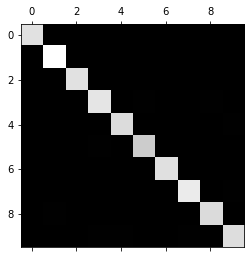

In [65]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [66]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

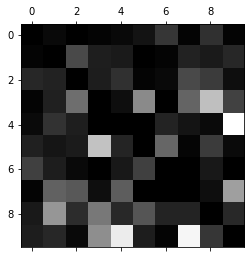

In [67]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [68]:
import matplotlib as mpl

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")


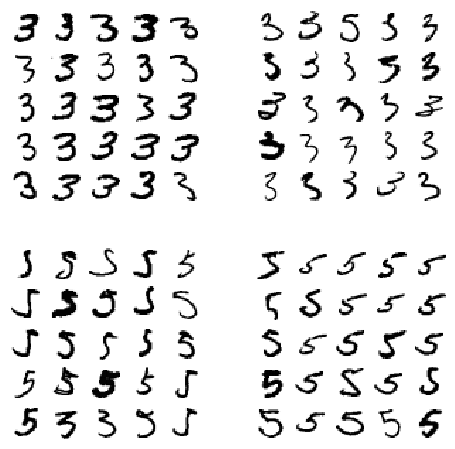

In [69]:
# plot_digits function is most likely a user defined function. need to check the jupyter
# notebook of Hands_on_ML for this chapter for more details.

cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()